In [1]:
#importamos librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Algoritmo de segmentacion por colores HSV
class ColorHSV:
    def convertirARGB(self, img):
      #convertimos a escala de grises
      gris = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      return gris
  
    def convertirAHSV(self,img):
      img_HSV =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
      h,s,v = cv2.split(img_HSV)
      return h
  
    def binRange(self,h,hmin,hmax):
      #binarizacion por rango de matiz
      binimg = cv2.inRange(h,hmin,hmax)
      return binimg

    def filtradoMor(self,binimg):
      #Aplicacion de filtrado morfologico para eliminar posible ruido
      kernel = np.ones((3,3),dtype='uint8') 
      img_eroded = cv2.erode(binimg,kernel,iterations=5) 
      img_dilated = cv2.dilate(binimg,kernel,iterations=4)
      return img_dilated
  
    def imgSegmented(self,img_filter,img_dilated):
      for i in range(3):
        img_filter[:,:,i] = cv2.bitwise_and(img_filter[:,:,i],img_dilated)
      return img_filter

In [3]:
#funcion para calcular el indice de jaccard
def jaccard(x,y):
  x = np.asarray(x) 
  y = np.asarray(y) 
  return np.double(np.bitwise_and(x, y).sum()) / np.double(np.bitwise_or(x, y).sum())

In [24]:
#algoritmo por segmentacion RGB
class ColorRGB:
    def convertirARGB(self, img):
      #convertimos a escala de grises
      gris = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      return gris
  
    def binRange(self,img,h,l,h2,l2):
      #extraccion de la region de interes
      rI = img[h:l,h2:l2,:]
      return rI
    
    def rangeRmin(self,rI):
      #extraccion de la region de interes rango minimo del color rojo
      rmin = np.min(rI[:,:,0].ravel())
      return rmin
    
    def rangeRmax(self,rI):
      #extraccion de la region de interes rango maximo del color rojo
      rmax = np.max(rI[:,:,0].ravel())
      return rmax

    def rangeGmin(self,rI):
      #extraccion de la region de interes rango minimo del color verde
      gmin = np.min(rI[:,:,1].ravel())
      return gmin
    def rangeGmax(self,rI):
      #extraccion de la region de interes rango maximo del color verde
      gmax = np.max(rI[:,:,1].ravel())
      return gmax

    def rangeBmin(self,rI):
      #extraccion de la region de interes rango minimo del color azul
      bmin = np.min(rI[:,:,2].ravel())
      return bmin
    
    def rangeBmax(self,rI):
      #extraccion de la region de interes rango maximo del color azul
      bmax = np.max(rI[:,:,2].ravel())
      return bmax

    def uBajo(self,rmin,gmin,bmin):
      #binarizacion por rango umbral en rgb
      umbral_bajo = np.array([rmin,gmin,bmin])
      return umbral_bajo

    def uAlto(self,rmax,gmax,bmax):
      #binarizacion por rango umbral en rgb
      umbral_alto = np.array([rmax,gmax,bmax])
      return umbral_alto
    
    def binarizacion(self,imgRGB,umbral_bajo,umbral_alto):
      #binarizacion por rango umbral en rgb
      binimg = cv2.inRange(imgRGB,umbral_bajo,umbral_alto)
      return binimg
    

    def filtradoMor(self,binimg):
      #Aplicacion de filtrado morfologico para eliminar posible ruido
      kernel = np.ones((3,3),dtype='uint8') 
      img_eroded = cv2.erode(binimg,kernel,iterations=5) 
      img_dilated = cv2.dilate(binimg,kernel,iterations=3)
      return img_dilated
      
    def imgSegmented(self,img_filter,img_dilated):
      for i in range(3):
        img_filter[:,:,i] = cv2.bitwise_and(img_filter[:,:,i],img_dilated)
      return img_filter

In [39]:
#algoritmo 1 -imagen 1
color = ColorHSV()

img1 = cv2.imread('kiwis.jpg')
img2 = cv2.imread('gato.jpg')
#Se llaman a los metodos
rgb1 = color.convertirARGB(img1)
HSV1 = color.convertirAHSV(img1)
hmin1,hmax1 = 31,44 #Obtención de rango de matiz, region de los kiwis partidos
#binarizacion por rango de matiz
bin1 = color.binRange(HSV1,hmin1,hmax1)
imgSegmentedI1A1 = color.filtradoMor(bin1)
################################################################################
################################################################################

#algoritmo 1 -imagen 2
#Se llaman a los metodos
rgb2 = color.convertirARGB(img2)
HSV2 = color.convertirAHSV(img2)
hmin2,hmax2 = 5,30 #Obtención de rango de matiz, region del gato
#binarizacion por rango de matiz
bin2 = color.binRange(HSV2,hmin2,hmax2)
imgSegmentedI2A1 = color.filtradoMor(bin2)
img_filter2 = rgb2.copy()
#filterimgSegmentedI2A1 = color.imgSegmented(img_filter2,imgSegmentedI2A1)

In [50]:
#algoritmo 2 - Imagen 1
color2 = ColorRGB()

rgb1 = color2.convertirARGB(img1)
rI = color2.binRange(rgb1,100,200,300,450) #zona del kiwi partido
#obtencion de rangos de color
rmin = color2.rangeRmin(rI)
rmax = color2.rangeRmax(rI)
gmin = color2.rangeGmin(rI)
gmax = color2.rangeGmax(rI)
bmin = color2.rangeBmin(rI)
bmax = color2.rangeBmax(rI)
#binarizacion por rango umbral en rgb
umbral_bajo = color2.uBajo(rmin,gmin,bmin)
umbral_alto = color2.uAlto(rmax,gmax,bmax)
#obtencion de la imagen binarizada
imgBin = color2.binarizacion(rgb1,umbral_bajo,umbral_alto)
#aplicacion del filtrado morfologico
imgSegmentedI1A2 = color2.filtradoMor(imgBin)
################################################################################
################################################################################
#algoritmo 2- imagen 2
rgb2 = color2.convertirARGB(img2)
rI2 = color2.binRange(rgb2,200,300,200,300) #zona del gato
#obtencion de rangos de color
rmin2 = color2.rangeRmin(rI2)
rmax2 = color2.rangeRmax(rI2)
gmin2 = color2.rangeGmin(rI2)
gmax2 = color2.rangeGmax(rI2)
bmin2 = color2.rangeBmin(rI2)
bmax2 = color2.rangeBmax(rI2)
#binarizacion por rango umbral en rgb
umbral_bajo2 = color2.uBajo(rmin2,gmin2,bmin2)
umbral_alto2 = color2.uAlto(rmax2,gmax2,bmax2)
#obtencion de la imagen binarizada
imgBin2 = color2.binarizacion(rgb2,umbral_bajo2,umbral_alto2)
#aplicacion del filtrado morfologico
imgSegmentedI2A2 = color2.filtradoMor(imgBin2)

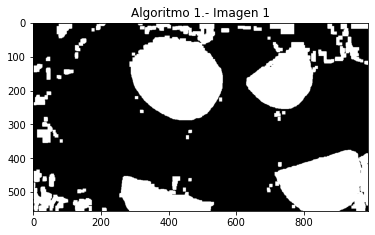

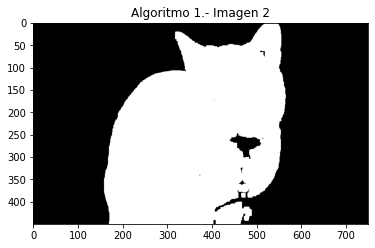

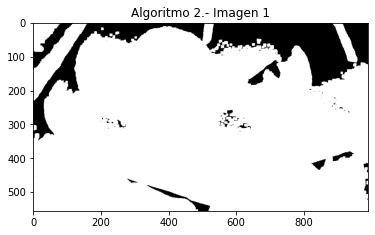

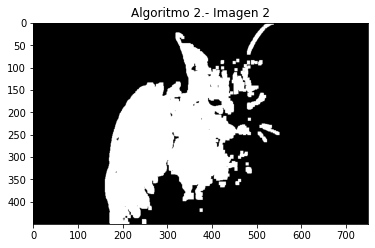

In [7]:
#mostrar resultados
plt.title('Algoritmo 1.- Imagen 1')
plt.imshow(imgSegmentedI1A1,'gray')
plt.show()

plt.title('Algoritmo 1.- Imagen 2')
plt.imshow(imgSegmentedI2A1,'gray')
plt.show()

plt.title('Algoritmo 2.- Imagen 1')
plt.imshow(imgSegmentedI1A2,'gray')
plt.show()

plt.title('Algoritmo 2.- Imagen 2')
plt.imshow(imgSegmentedI2A2,'gray')
plt.show()

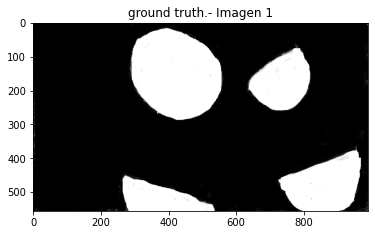

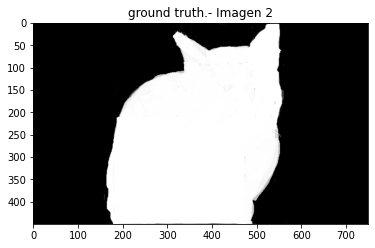

El indice de jaccar del algoritmo 1 respecto a la imagen 1 es:  0.6772847997432756
El indice de jaccar del algoritmo 2 respecto a la imagen 1 es:  0.2506914839238561
El indice de jaccar del algoritmo 1 respecto a la imagen 2 es:  0.9330588073909329
El indice de jaccar del algoritmo 2 respecto a la imagen 2 es:  0.5529297937504861


In [8]:
gT1 = cv2.imread('kiwisBin.jpg')
gT2 = cv2.imread('gatoBin.jpg')
gris = cv2.cvtColor(gT1, cv2.COLOR_BGR2RGB)
gris2 = cv2.cvtColor(gT2, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(gris)
r2,g2,b2 = cv2.split(gris2)

plt.title('ground truth.- Imagen 1')
plt.imshow(r,'gray')
plt.show()

plt.title('ground truth.- Imagen 2')
plt.imshow(r2,'gray')
plt.show()
print('El indice de jaccar del algoritmo 1 respecto a la imagen 1 es: ',jaccard(r,imgSegmentedI1A1))
print('El indice de jaccar del algoritmo 2 respecto a la imagen 1 es: ',jaccard(r,imgSegmentedI1A2))
print('El indice de jaccar del algoritmo 1 respecto a la imagen 2 es: ',jaccard(r2,imgSegmentedI2A1))
print('El indice de jaccar del algoritmo 2 respecto a la imagen 2 es: ',jaccard(r2,imgSegmentedI2A2))

# **Pasos extras**

---



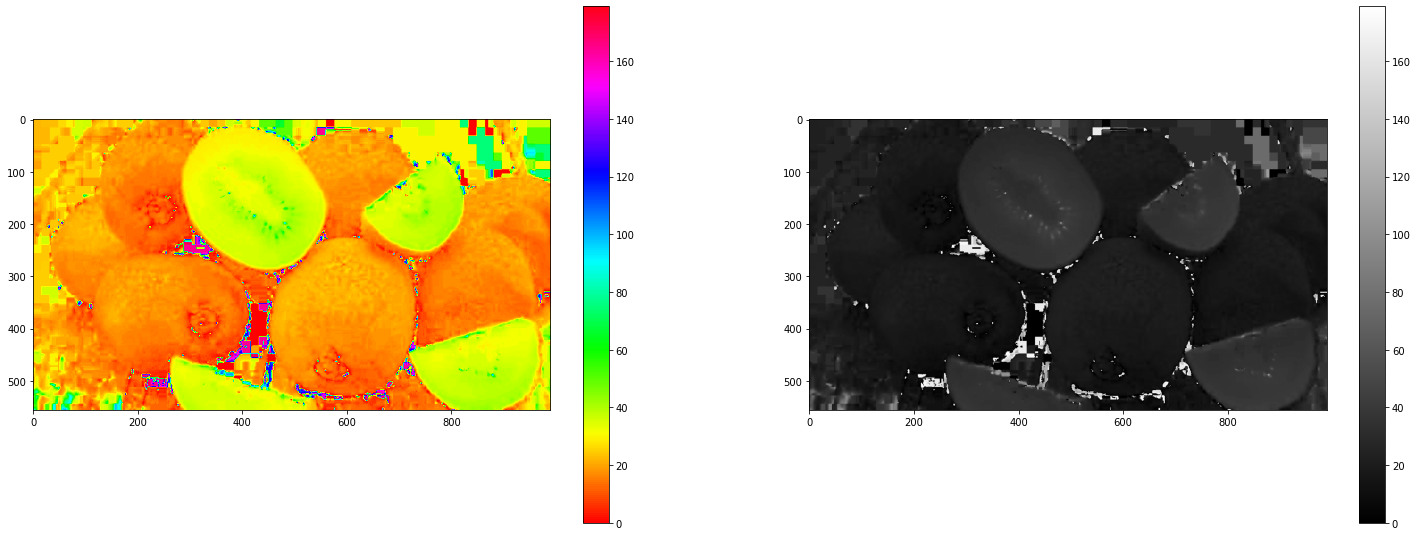

In [9]:
#obtención de los rangos de colos HSV
plt.figure(figsize=(25.5,9.5))

plt.subplot(121)
plt.imshow(HSV1,'hsv') # con la primer imagen mediante la barra se obtienen los rangos de 31,44, la cual es la zona de los kiwis partidos
plt.colorbar()

plt.subplot(122)
plt.imshow(HSV1,'gray')
plt.colorbar()

plt.show()

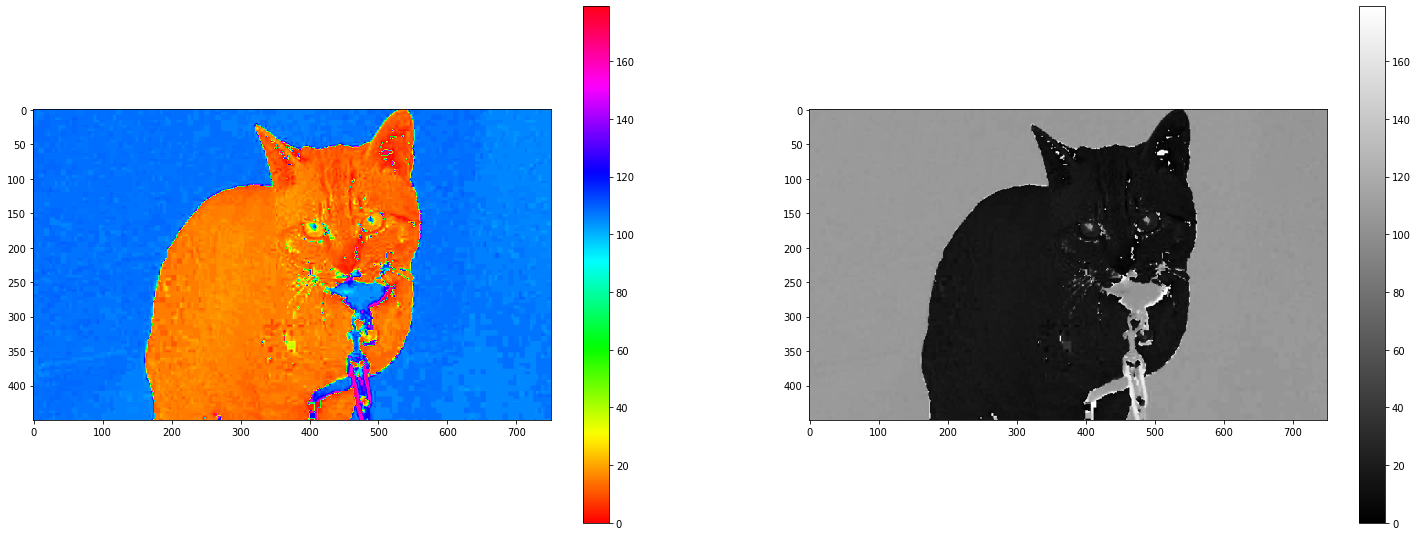

In [10]:
#obtención de los rangos de colos HSV
plt.figure(figsize=(25.5,9.5))

plt.subplot(121)
plt.imshow(HSV2,'hsv') # con la primer imagen mediante la barra se obtienen los 5,30 Obtención de rango de matiz, region del gato
plt.colorbar()

plt.subplot(122)
plt.imshow(HSV2,'gray')
plt.colorbar()

plt.show()

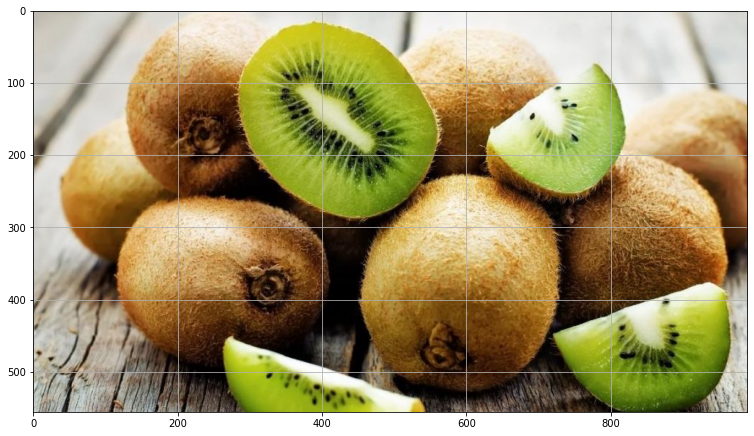

In [11]:
#obtencion de los rangos del algoritmo 2 para la imagen 1
plt.figure(figsize=(12.8,9.6))
plt.imshow(rgb1)
plt.grid('on')
plt.show()

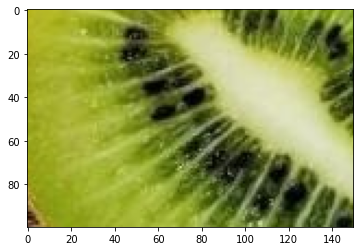

In [12]:
#parte extraida 
#Region de kiwi 100,200,300,450

plt.imshow(rI)
plt.show()

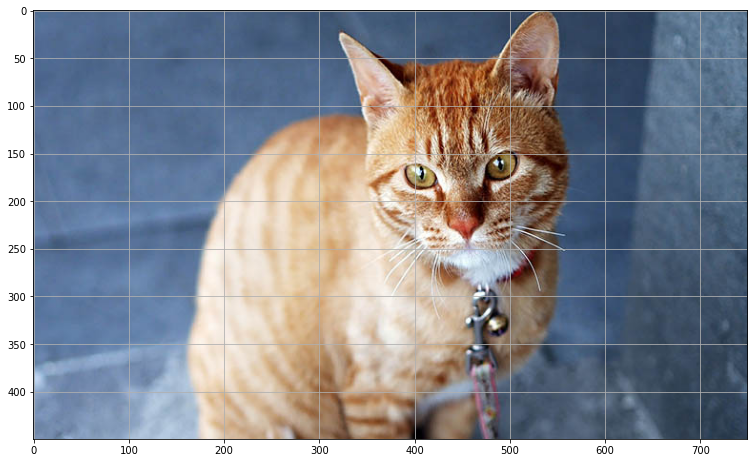

In [13]:
#obtencion de los rangos del algoritmo 2 para la imagen 2
plt.figure(figsize=(12.8,9.6))
plt.imshow(rgb2)
plt.grid('on')
plt.show()

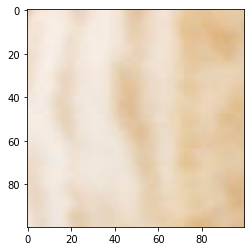

In [14]:
#parte extraida 
#Region de gato 250:300,200:300

plt.imshow(rI2)
plt.show()

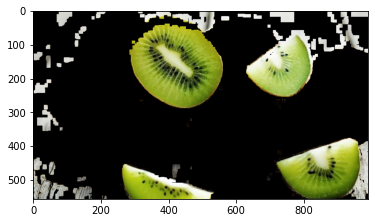

In [46]:
#aplicacion del filtro de la imagen original Algoritmo 1- Imagen 1
img_filter = rgb1.copy()

filterimgSegmentedI1A1 = color.imgSegmented(img_filter,imgSegmentedI1A1)
plt.imshow(filterimgSegmentedI1A1)
plt.show()

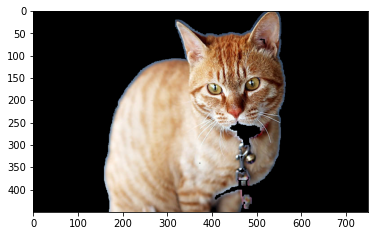

In [47]:
#aplicacion del filtro de la imagen original Algoritmo 1- Imagen 2
img_filter2 = rgb2.copy()

filterimgSegmentedI2A1 = color.imgSegmented(img_filter2,imgSegmentedI2A1)
plt.imshow(filterimgSegmentedI2A1)
plt.show()

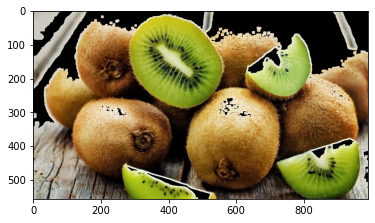

In [51]:
#aplicacion del filtro de la imagen original Algoritmo 2- Imagen 1
img_filter3 = rgb1.copy()

filterimgSegmentedI1A2 = color2.imgSegmented(img_filter3,imgSegmentedI1A2)
plt.imshow(filterimgSegmentedI1A2)
plt.show()

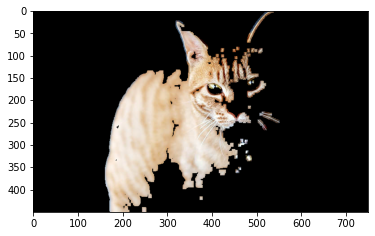

In [52]:
#aplicacion del filtro de la imagen original Algoritmo 2- Imagen 2
img_filter4 = rgb2.copy()

filterimgSegmentedI2A2 = color2.imgSegmented(img_filter4,imgSegmentedI2A2)
plt.imshow(filterimgSegmentedI2A2)
plt.show()